In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

### Importing Data/ Cleaning
- Will import data and clean data 
- conversions and removal/replcing missing data

### 10 Year Treasury Maturity Rate

In [209]:
ten_year_Maturity = pd.read_csv("resources/tenYearTreasureMaturityRate.csv", index_col="DATE", parse_dates = True)

In [210]:
ten_year_Maturity.columns = ["ten_year"]

In [211]:
ten_year_Maturity.replace(["."], np.nan, inplace=True)

In [212]:
ten_year_Maturity = ten_year_Maturity["ten_year"].apply(lambda x: pd.to_numeric(x))

In [213]:
ten_year_Maturity = pd.DataFrame(ten_year_Maturity)

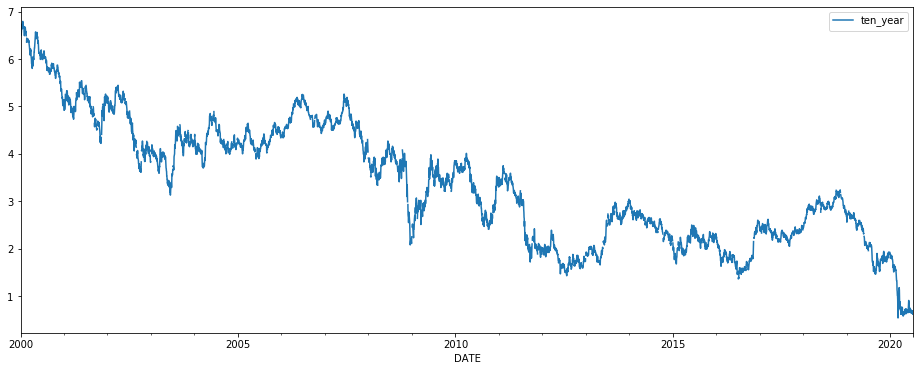

In [214]:
ten_year_Maturity.plot(figsize = (16,6))

### Moodys AAA corporate bond yield

In [215]:
aaa_yield = pd.read_csv("resources/AA_CorporateBondYield.csv", index_col="DATE", parse_dates = True)

In [216]:
aaa_yield.columns = ["yield"]

In [217]:
aaa_yield.replace(["."], np.nan, inplace=True)

In [218]:
aaa_yield = aaa_yield["yield"].apply(lambda x: pd.to_numeric(x))

In [219]:
aaa_yield = pd.DataFrame(aaa_yield)

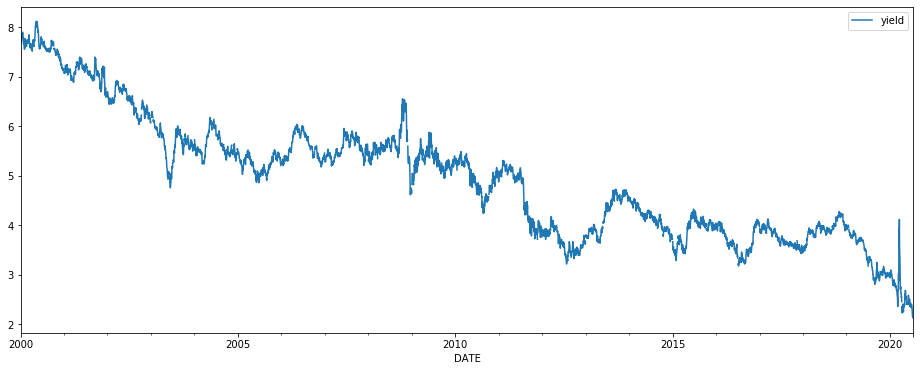

In [220]:
aaa_yield.plot(figsize = (16,6))

### Inspecting data 
- Looks like our entries are off a few days we will need to adjust the data points to make even

In [221]:
aaa_yield.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5359 entries, 2000-01-03 to 2020-07-16
Data columns (total 1 columns):
yield    5139 non-null float64
dtypes: float64(1)
memory usage: 83.7 KB


In [222]:
ten_year_Maturity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5358 entries, 2000-01-03 to 2020-07-15
Data columns (total 1 columns):
ten_year    5137 non-null float64
dtypes: float64(1)
memory usage: 83.7 KB


In [223]:
aaa_yield = aaa_yield.loc["2000-1-3":"2020-07-15"]

In [224]:
data = pd.concat([ten_year_Maturity, aaa_yield], axis=1)

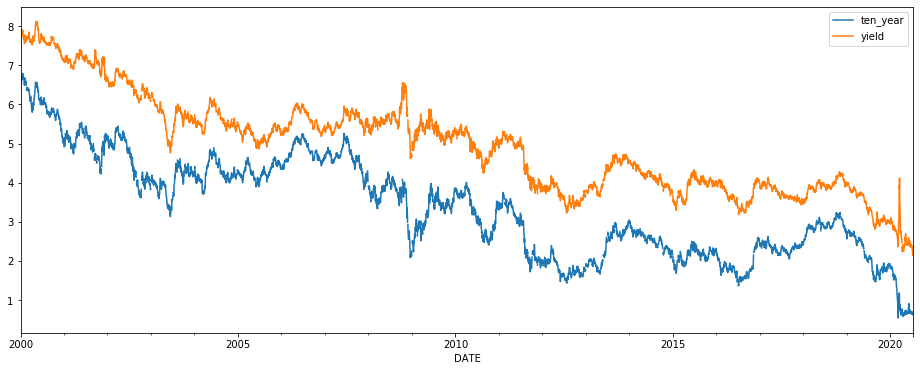

In [225]:
data.plot(figsize = (16,6))

### Importing Volatility Data 

In [226]:
vol_tickers = ["^VIX","UVXY"]

In [227]:
vol_data = pd.DataFrame()

In [228]:
for t in vol_tickers:
    vol_data[t] = web.DataReader(t, data_source="yahoo", start = "2000-01-03", end = "2020-07-16")["Adj Close"]

### Capital Markets

In [229]:
tickers = ["^GSPC", "^DJI", "^RUT", "^IXIC"]

In [230]:
cap_data = pd.DataFrame()

In [231]:
for t in tickers:
    cap_data[t] = web.DataReader(t, data_source="yahoo",start = "2000-01-03", end = "2020-07-16")["Adj Close"]
    

In [232]:
cap_data

,^GSPC,^DJI,^RUT,^IXIC
Date,,,,
2000-01-03,1455.219971,11357.509766,496.420013,4131.149902
2000-01-04,1399.420044,10997.929688,478.380005,3901.689941
2000-01-05,1402.109985,11122.650391,478.829987,3877.540039
2000-01-06,1403.449951,11253.259766,475.339996,3727.129883
2000-01-07,1441.469971,11522.559570,488.309998,3882.620117
...,...,...,...,...
2020-07-10,3185.040039,26075.300781,1422.680054,10617.440430
2020-07-13,3155.219971,26085.800781,1403.569946,10390.839844
2020-07-14,3197.520020,26642.589844,1428.260010,10488.580078


In [233]:
data = pd.concat([data,vol_data,cap_data], axis=1)

In [234]:
data.corr()

,ten_year,yield,^VIX,UVXY,^GSPC,^DJI,^RUT,^IXIC
ten_year,1.000000,0.940272,0.044784,-0.078680,-0.566073,-0.604900,-0.657000,-0.564250
yield,0.940272,1.000000,0.264229,0.064279,-0.691595,-0.730835,-0.789083,-0.669231
^VIX,0.044784,0.264229,1.000000,0.336459,-0.339908,-0.334876,-0.419115,-0.255667
UVXY,-0.078680,0.064279,0.336459,1.000000,-0.404207,-0.366494,-0.439937,-0.349300
^GSPC,-0.566073,-0.691595,-0.339908,-0.404207,1.000000,0.992015,0.959886,0.984508
^DJI,-0.604900,-0.730835,-0.334876,-0.366494,0.992015,1.000000,0.971269,0.971569
^RUT,-0.657000,-0.789083,-0.419115,-0.439937,0.959886,0.971269,1.000000,0.925220
^IXIC,-0.564250,-0.669231,-0.255667,-0.349300,0.984508,0.971569,0.925220,1.000000


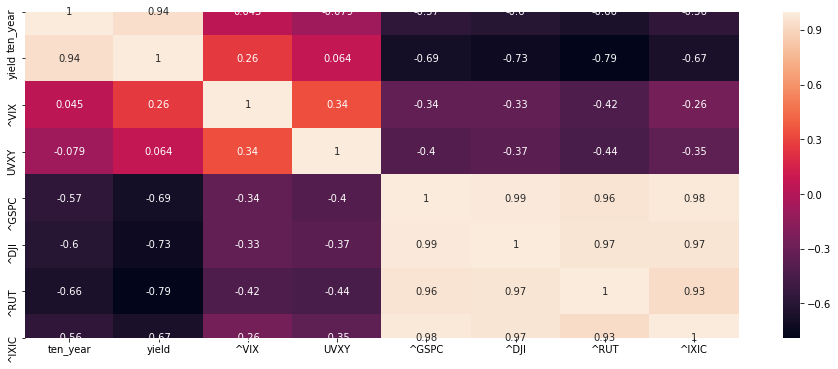

In [235]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True)

### Daily Retuns

In [236]:
for x in data.columns:
    data[f"{x} returns"] = data[f"{x}"].pct_change()

In [237]:
data.corr()

,ten_year,yield,^VIX,UVXY,^GSPC,^DJI,^RUT,^IXIC,ten_year returns,yield returns,^VIX returns,UVXY returns,^GSPC returns,^DJI returns,^RUT returns,^IXIC returns
ten_year,1.000000,0.940272,0.044784,-0.078680,-0.566073,-0.604900,-0.657000,-0.564250,0.020276,0.023837,-0.011357,-0.016955,-0.016347,-0.010186,-0.003085,-0.027208
yield,0.940272,1.000000,0.264229,0.064279,-0.691595,-0.730835,-0.789083,-0.669231,0.017217,0.027519,-0.015490,-0.036801,-0.021958,-0.015333,-0.006456,-0.032295
^VIX,0.044784,0.264229,1.000000,0.336459,-0.339908,-0.334876,-0.419115,-0.255667,-0.058276,-0.019910,0.103704,0.201394,-0.128411,-0.124482,-0.123235,-0.109787
UVXY,-0.078680,0.064279,0.336459,1.000000,-0.404207,-0.366494,-0.439937,-0.349300,0.013496,0.008392,-0.021268,-0.014400,0.027201,0.025227,0.037692,0.020161
^GSPC,-0.566073,-0.691595,-0.339908,-0.404207,1.000000,0.992015,0.959886,0.984508,-0.002755,-0.005762,0.010900,0.031493,0.025150,0.022733,0.009991,0.026981
^DJI,-0.604900,-0.730835,-0.334876,-0.366494,0.992015,1.000000,0.971269,0.971569,-0.002624,-0.005888,0.011510,0.030102,0.025084,0.023279,0.009377,0.027300
^RUT,-0.657000,-0.789083,-0.419115,-0.439937,0.959886,0.971269,1.000000,0.925220,0.003002,0.000419,0.010775,0.018491,0.027455,0.024175,0.014188,0.031394
^IXIC,-0.564250,-0.669231,-0.255667,-0.349300,0.984508,0.971569,0.925220,1.000000,-0.006657,-0.010056,0.011512,0.035153,0.023439,0.019518,0.009298,0.027915
ten_year returns,0.020276,0.017217,-0.058276,0.013496,-0.002755,-0.002624,0.003002,-0.006657,1.000000,0.745605,-0.295711,-0.332897,0.385175,0.386746,0.360060,0.326128
yield returns,0.023837,0.027519,-0.019910,0.008392,-0.005762,-0.005888,0.000419,-0.010056,0.745605,1.000000,-0.190757,-0.170436,0.226609,0.213181,0.218529,0.197952


### Deep Dive
- Appears the AAA corporate bond yield daily returns are inversely coorelate to the returns of UVXY 
- We will take a deeper look below
- Lets see if the 10 year maturity rate  have any influece on the Volatility market

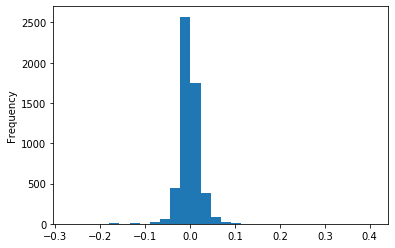

In [238]:
data["ten_year returns"].plot(kind = "hist", bins = 30)

In [239]:
data = data.dropna()

In [240]:
data

,ten_year,yield,^VIX,UVXY,^GSPC,^DJI,^RUT,^IXIC,ten_year returns,yield returns,^VIX returns,UVXY returns,^GSPC returns,^DJI returns,^RUT returns,^IXIC returns
2011-10-05,1.92,3.92,37.810001,1.813800e+08,1144.030029,10939.950195,658.109985,2460.510010,0.060773,0.034301,-0.073738,-0.118659,0.017866,0.012142,0.014600,0.023158
2011-10-06,2.01,3.99,36.270000,1.740000e+08,1164.969971,11123.330078,673.799988,2506.820068,0.046875,0.017857,-0.040730,-0.040688,0.018304,0.016762,0.023841,0.018821
2011-10-07,2.10,4.05,36.200001,1.765200e+08,1155.459961,11103.120117,656.210022,2479.350098,0.044776,0.015038,-0.001930,0.014483,-0.008163,-0.001817,-0.026106,-0.010958
2011-10-11,2.18,4.06,32.860001,1.506000e+08,1195.540039,11416.299805,688.969971,2583.030029,0.038095,0.002469,-0.004846,-0.034244,0.000544,-0.001476,0.005942,0.006617
2011-10-12,2.24,4.13,31.260000,1.287600e+08,1207.250000,11518.849609,700.380005,2604.729980,0.027523,0.017241,-0.048691,-0.145020,0.009795,0.008983,0.016561,0.008401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-09,0.62,2.16,29.260000,3.150000e+01,3152.050049,25706.089844,1398.920044,10547.750000,-0.074627,-0.035714,0.042023,0.025057,-0.005644,-0.013856,-0.019952,0.005266
2020-07-10,0.65,2.19,27.290001,3.023000e+01,3185.040039,26075.300781,1422.680054,10617.440430,0.048387,0.013889,-0.067327,-0.040317,0.010466,0.014363,0.016985,0.006607
2020-07-13,0.64,2.18,32.189999,3.456000e+01,3155.219971,26085.800781,1403.569946,10390.839844,-0.015385,-0.004566,0.179553,0.143235,-0.009363,0.000403,-0.013432,-0.021342
2020-07-14,0.63,2.13,29.520000,3.153000e+01,3197.520020,26642.589844,1428.260010,10488.580078,-0.015625,-0.022936,-0.082945,-0.087674,0.013406,0.021345,0.017591,0.009406


In [241]:
data[data["ten_year returns"] * 100 < -15]

,ten_year,yield,^VIX,UVXY,^GSPC,^DJI,^RUT,^IXIC,ten_year returns,yield returns,^VIX returns,UVXY returns,^GSPC returns,^DJI returns,^RUT returns,^IXIC returns
2020-03-06,0.74,2.36,41.939999,33.450001,2972.370117,25864.779297,1449.219971,8575.620117,-0.195652,-0.063492,0.058556,0.165099,-0.017054,-0.009820,-0.020016,-0.018649
2020-03-09,0.54,2.46,54.459999,45.770000,2746.560059,23851.019531,1313.439941,7950.680176,-0.270270,0.042373,0.298522,0.368311,-0.075970,-0.077857,-0.093692,-0.072874
2020-03-16,0.73,2.88,82.690002,90.139999,2386.129883,20188.519531,1037.420044,6904.589844,-0.223404,-0.049505,0.429881,0.574773,-0.119841,-0.129265,-0.142720,-0.123213
2020-03-20,0.92,4.12,66.040001,91.110001,2304.919922,19173.980469,1013.890015,6879.520020,-0.178571,0.067358,-0.082778,-0.031672,-0.043360,-0.045462,-0.042371,-0.037907
2020-03-23,0.76,3.57,61.590000,69.930000,2237.399902,18591.929688,1002.400024,6860.669922,-0.173913,-0.133495,-0.067383,-0.232466,-0.029294,-0.030356,-0.011333,-0.002740
2020-04-15,0.63,2.37,40.840000,47.220001,2783.360107,23504.349609,1183.979980,8393.179688,-0.171053,0.062780,0.081568,0.121615,-0.022030,-0.018598,-0.043117,-0.014392


In [242]:
np.mean(data[data["ten_year returns"] * 100 < -17]["^VIX returns"])

0.11972755794866798

In [243]:
np.mean(data[data["ten_year returns"] * 100 < -17]["^VIX"])

57.9266668955485

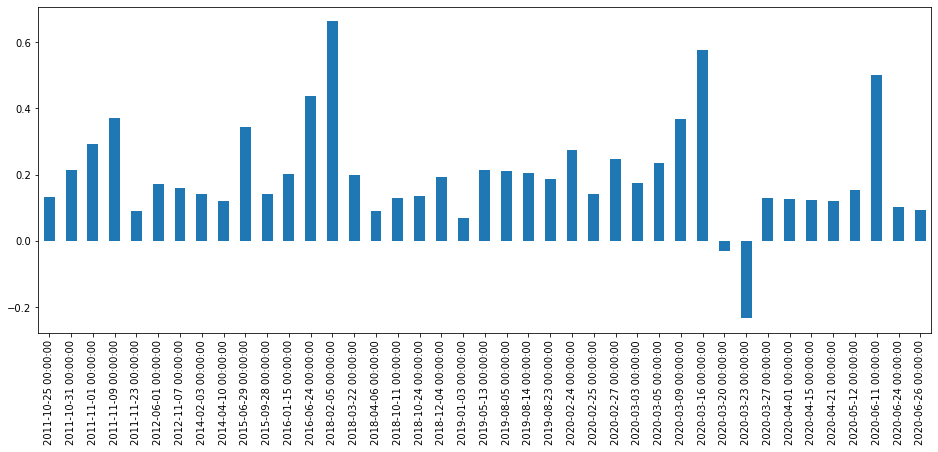

In [261]:
data[(data["ten_year returns"] * 100 < -2) & (data["^GSPC returns"] * 100 < -2)]["UVXY returns"].plot(kind = "bar",
                                                                    figsize = (16,6))

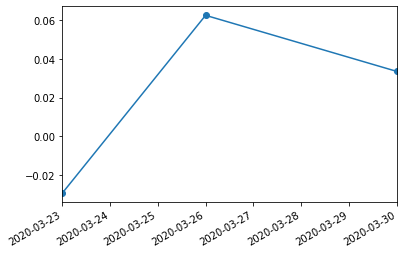

In [309]:
data[(data["yield returns"] * 100 < -7)]["^GSPC returns"].plot(marker = "o")

In [267]:
data.loc["2011-11-23":]["UVXY returns"]

2011-11-23    0.089991
2011-11-25    0.025695
2011-11-28   -0.095277
2011-11-29   -0.042215
2011-11-30   -0.177251
                ...   
2020-07-09    0.025057
2020-07-10   -0.040317
2020-07-13    0.143235
2020-07-14   -0.087674
2020-07-15   -0.041231
Name: UVXY returns, Length: 2157, dtype: float64